In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [3]:
data = pd.read_csv("C://Users//Dell//Downloads//Excel R//Python codes//Regression//MLR//Cars.csv")
data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


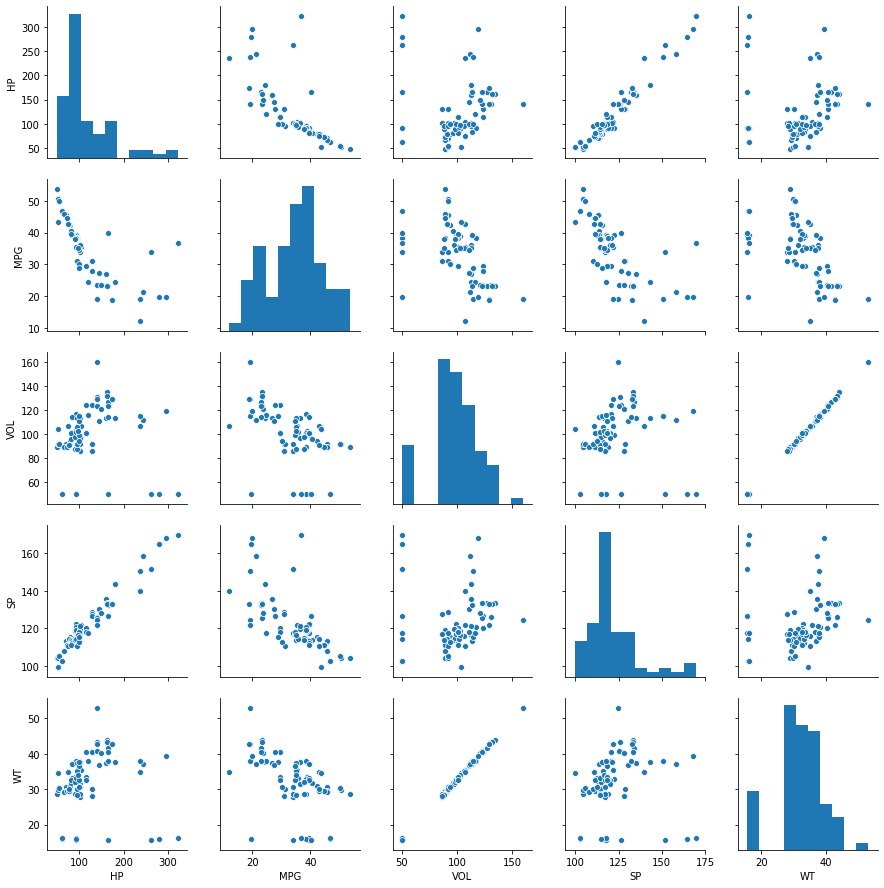

In [30]:
type(data)
sns.pairplot(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
HP     81 non-null int64
MPG    81 non-null float64
VOL    81 non-null int64
SP     81 non-null float64
WT     81 non-null float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


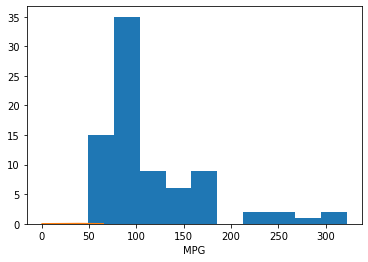

In [9]:
#EDA
data.describe()
data.info()
plt.pyplot.hist(data.HP)
sns.distplot(data.MPG)

In [12]:
np.sum(data.isna())

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

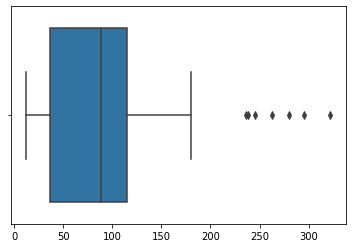

In [13]:
sns.boxplot(data)

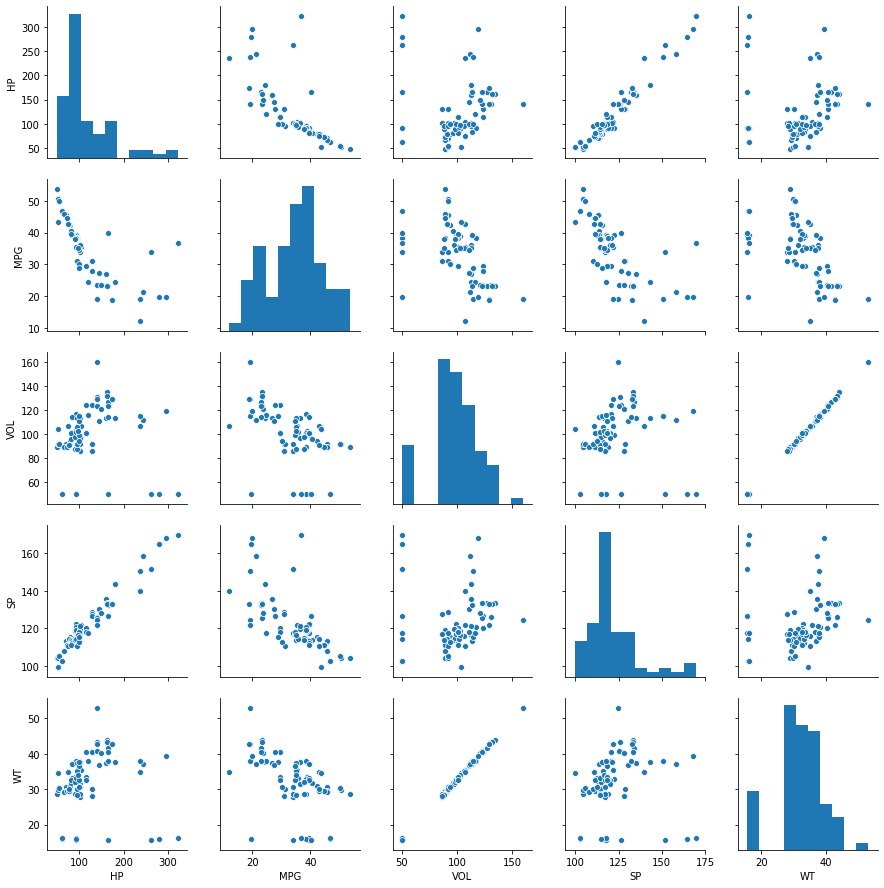

In [92]:
sns.pairplot(data)

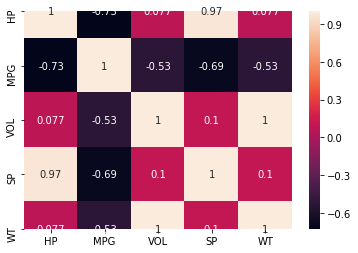

In [17]:
data.corr()
sns.heatmap(data.corr(),annot=True)

In [23]:
#Model building  
import statsmodels.formula.api as smf
model = smf.ols('MPG~HP+VOL+SP+WT',data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Sat, 07 Mar 2020   Prob (F-statistic):           1.54e-23
Time:                        10:24:42   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
model.params

Intercept    30.677336
HP           -0.205444
VOL          -0.336051
SP            0.395627
WT            0.400574
dtype: float64

In [26]:
#Model building with WT only
model_WT = smf.ols('MPG~WT', data).fit()
model_WT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     30.34
Date:                Sat, 07 Mar 2020   Prob (F-statistic):           4.38e-07
Time:                        10:28:52   Log-Likelihood:                -280.42
No. Observations:                  81   AIC:                             564.8
Df Residuals:                      79   BIC:                             569.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.2296      3.876     14.249      0.000      47.514      62.945
WT            -0.6420      0.117     -5.508      0.000      -0.874      -0.410
==============================================================================
Omnibus:                        2.735   Durbin-Watson:                   0.555
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.045
Skew:                          -0.263   Prob(JB):                        0.360
Kurtosis:                       3.573   Cond. No.                         149.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
#Model building with VOL only
model_VOL = smf.ols('MPG~VOL', data).fit()
model_VOL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     30.71
Date:                Sat, 07 Mar 2020   Prob (F-statistic):           3.82e-07
Time:                        10:29:33   Log-Likelihood:                -280.28
No. Observations:                  81   AIC:                             564.6
Df Residuals:                      79   BIC:                             569.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.8171      3.957     14.106      0.000      47.941      63.693
VOL           -0.2166      0.039     -5.541      0.000      -0.294      -0.139
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.997
Skew:                          -0.263   Prob(JB):                        0.368
Kurtosis:                       3.562   Cond. No.                         462.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
#Model building with WT and VOL there exist colinearity problem
model_WTVOL = smf.ols('MPG~WT+VOL', data).fit()
model_WTVOL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     15.33
Date:                Sat, 07 Mar 2020   Prob (F-statistic):           2.43e-06
Time:                        10:29:53   Log-Likelihood:                -280.16
No. Observations:                  81   AIC:                             566.3
Df Residuals:                      78   BIC:                             573.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.8847      4.534     12.546      0.000      47.858      65.912
WT             1.4349      2.929      0.490      0.626      -4.397       7.266
VOL           -0.6983      0.984     -0.710      0.480      -2.658       1.261
==============================================================================
Omnibus:                        2.405   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.712
Skew:                          -0.251   Prob(JB):                        0.425
Kurtosis:                       3.506   Cond. No.                         597.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

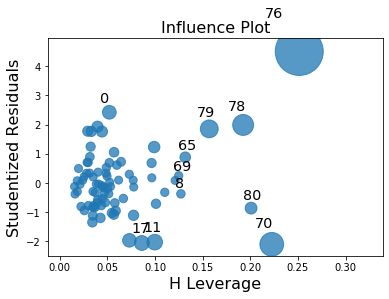

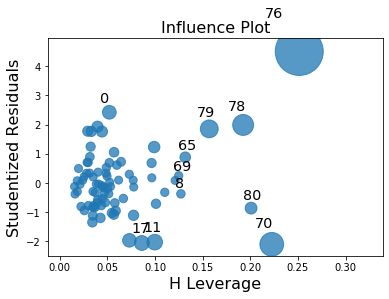

In [34]:
#Remove the influence observations:
# Checking whether data has any influential values
# influence index plots
import statsmodels.api as sm
sm.graphics.influence_plot(model)
#From the graph it shows 76 and 78 are the influential plots
# Studentized Residuals = Residual/standard deviation of residuals <- this is how we got the studentized_residuals

In [37]:
data_new= data.drop(data.index[[76,78]],axis=0)

# X => A B C D 
#X.drop(["A","B"],axis=1) # Dropping columns 
#X.drop(X.index[[5,9,19]],axis=0)
#X.drop(["X1","X2"],aixs=1)
#X.drop(X.index[[0,2,3]],axis=0)

In [42]:
#Building the Model after removing the influential observations
model1 = smf.ols('MPG~VOL+WT+HP+SP',data_new).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     103.2
Date:                Sat, 07 Mar 2020   Prob (F-statistic):           1.76e-29
Time:                        10:57:14   Log-Likelihood:                -212.89
No. Observations:                  79   AIC:                             435.8
Df Residuals:                      74   BIC:                             447.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.3964     12.506      1.551      0.125      -5.521      44.314
VOL           -0.2876      0.471     -0.611      0.543      -1.226       0.650
WT             0.4190      1.402      0.299      0.766      -2.375       3.213
HP            -0.2589      0.034     -7.671      0.000      -0.326      -0.192
SP             0.4916      0.132      3.717      0.000       0.228       0.755
==============================================================================
Omnibus:                       14.158   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.671
Skew:                           0.945   Prob(JB):                     0.000395
Kurtosis:                       4.091   Cond. No.                     6.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
print(model1.conf_int(alpha=0.05))

                  0          1
Intercept -5.521481  44.314363
VOL       -1.225516   0.650303
WT        -2.374749   3.212839
HP        -0.326102  -0.191617
SP         0.228052   0.755167


In [48]:
pred = model1.predict(data_new)
pred

0     44.386472
1     43.312122
2     43.197624
3     43.431364
4     43.096156
        ...    
74    23.823618
75    20.238082
77    14.629498
79     7.890851
80    10.923816
Length: 79, dtype: float64

In [51]:
# calculating VIF's values of independent variables
rsq_hp= smf.ols('HP~SP+WT+VOL',data_new).fit().rsquared
vif_hp = 1/(1-rsq_hp)#16.33

16.33242174977343

In [53]:
rsq_wt = smf.ols('WT~HP+SP+VOL',data_new).fit().rsquared
vif_wt = 1/(1-rsq_wt)#564.9862078239127

In [58]:
rsq_vol = smf.ols('VOL~HP+WT+SP',data_new).fit().rsquared
vif_vol = 1/(1-rsq_vol)#564.8458302030133

564.8458302030133

In [60]:
rsq_sp = smf.ols('SP~VOL+HP+WT',data_new).fit().rsquared
vif_sp = 1/(1-rsq_sp)#16.351218924114963

In [65]:
d1 = {'Variables':['Hp','Wt','Vol','Sp'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
vif_df = pd.DataFrame(d1)
vif_df

,Variables,VIF
0,Hp,16.332422
1,Wt,564.986208
2,Vol,564.845830
3,Sp,16.351219


In [66]:
data_new1 = data.drop('WT',axis=1)
data_new1

,HP,MPG,VOL,SP
0,49,53.700681,89,104.185353
1,55,50.013401,92,105.461264
2,55,50.013401,92,105.461264
3,70,45.696322,92,113.461264
4,53,50.504232,92,104.461264
...,...,...,...,...
76,322,36.900000,50,169.598513
77,238,19.197888,115,150.576579
78,263,34.000000,50,151.598513
79,295,19.833733,119,167.944460


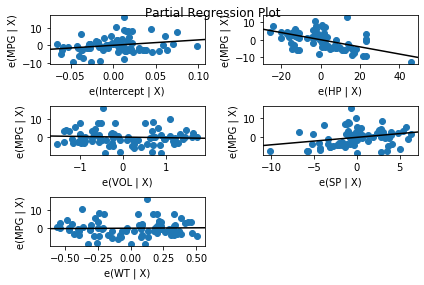

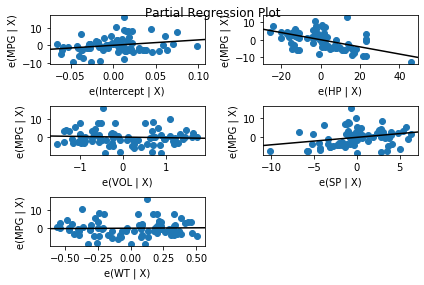

In [68]:
sm.graphics.plot_partregress_grid(model)

In [71]:
final_model = smf.ols('MPG~HP+SP+VOL',data_new1).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Sat, 07 Mar 2020   Prob (F-statistic):           1.56e-24
Time:                        11:49:56   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
SP             0.4007      0.156      2.571      0.012       0.090       0.711
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
fin_pre = final_model.predict()
fin_pre

array([43.59076921, 42.25679373, 42.25679373, 42.36149697, 42.26954392,
       42.85590319, 42.25679373, 48.13220633, 48.13220633, 40.76616389,
       41.43447018, 47.94095346, 39.8656524 , 41.43447018, 41.67942553,
       41.43447018, 41.27332025, 47.94095346, 41.27332025, 38.01721633,
       38.66367435, 37.4600096 , 38.11461526, 39.42853629, 40.09224004,
       46.73897542, 35.69723723, 38.66367435, 38.09466788, 35.87282411,
       35.04066617, 37.18309295, 37.32689014, 34.69005715, 37.40254791,
       37.63924859, 39.28726919, 38.33839413, 38.33839413, 35.96910103,
       34.13369379, 35.28730823, 37.34958175, 38.25374535, 35.95926668,
       36.20871751, 34.23109277, 35.56225948, 36.95791342, 33.17920119,
       33.17920119, 33.17920119, 29.38875376, 27.38159079, 28.31041139,
       28.69213831, 35.78519493, 33.17920119, 35.43009046, 32.36990647,
       29.73729032, 28.87232774, 25.07081684, 26.38923335, 25.85376783,
       36.45743943, 25.91010746, 23.76768064, 24.4268889 , 20.12

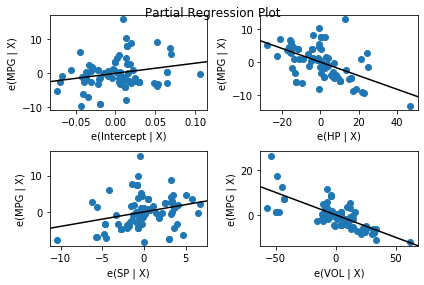

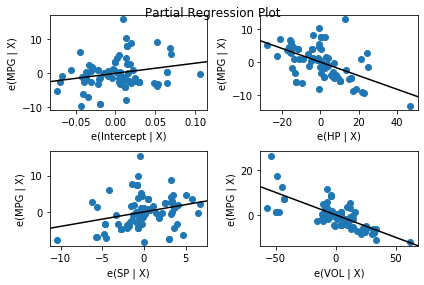

In [75]:
import statsmodels.api as sm
sm.graphics.plot_partregress_grid(final_model)

In [82]:
import sklearn.metrics as metrics
metrics.mean_absolute_error(data_new1.MPG,fin_pre)
metrics.mean_squared_error(data_new1.MPG,fin_pre)
np.sqrt(metrics.mean_squared_error(data_new1.MPG,fin_pre))

4.348684098518911

Text(0, 0.5, 'fitted_values')

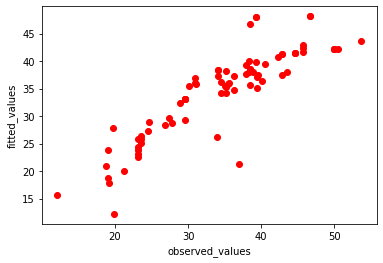

In [88]:
######  Linearity #########
# Observed values VS Fitted values
plt.pyplot.scatter(data_new1.MPG,fin_pre,c="r");plt.pyplot.xlabel("observed_values");plt.pyplot.ylabel("fitted_values")

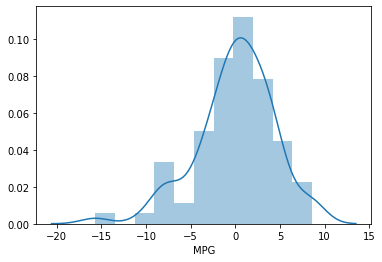

In [91]:
sns.distplot(fin_pre - data_new1.MPG)